# SASPy for Machine Learning
The SASPy package creates a bridge between Python and SAS 9.4. This package enables a Python developer, familiar with Pandas data frames or SAS datasets, to leverage the power of SAS by connecting a Python process to a SAS 9.4 installation, where it will run SAS code.

Additional information about the SASPy package can be found on the [SASPy GitHub page](https://github.com/sassoftware/saspy) or on the [SASPy documentation site](https://sassoftware.github.io/saspy/index.html). 

In this notebook, we will discuss:
- [Setting Up SASPy to Run Locally on a Windows Machine](#Setting-Up-SASPy-to-Run-Locally-on-a-Windows-Machine)
- [Importing Packages and Starting SASPy Session](#Importing-Packages-and-Starting-SASPy-Session)
- [Loading Data](#Loading-Data)
- [Exploring and Visualizing Data](#Exploring-and-Visualizing-Data)
- [Running SAS Code](#Running-SAS-Code)
- [Analytical Modeling using SAS Procedures](#Analytical-Modeling-using-SAS-Procedures)
- [Analytical Modeling using Python Functions](#Analytical-Modeling-using-Python-Functions)
- [Model Comparison](#Model-Comparison)
- [Conclusion](#Conclusion)
*** 
## Setting Up SASPy to Run Locally on a Windows Machine
Before you can get started programming in SAS and Python, you need a few things.

First, ensure that you have Jupyter Notebook and Python 3.X installed on your machine. I recommend using the [Anaconda Distribution](https://www.anaconda.com/distribution/) if you don't already have Jupyter Notebook and Python installed. Next, ensure that you have downloaded and installed Java. Finally, make sure you have a valid SAS 9.4 license. 

Once you have finished downloading and installing the necessary applications, launch Jupyter Notebook. From Jupyter Notebook, open a new terminal file by clicking the *New* button in the upper right corner of the Jupyter home page and selecting *Terminal* and type the following command: 

> pip install saspy  

Now, from your Jupyter home page, open a new notebook by clicking the *New* button in the upper right corner of the Jupyter home page and selecting *Python 3*. Copy the cell below into your notebook and click *Run*. You only need to run this code the first time you set up SASPy. 

In [ ]:
from saspy import autocfg
autocfg.main()

Now you are ready to use SASPy!

Want the complete step by step instruction or looking for a difference set up? Please review the [Installation and Configuration Guide](https://sassoftware.github.io/saspy/install.html#).

Encountered a problem in installation? The [Troubleshooting Guide](https://sassoftware.github.io/saspy/troubleshooting.html) is very thorough and helpful! 
***
## Importing Packages and Starting SASPy Session
First let us install all the SAS and Python packages we will use in the notebook. 

In [1]:
# For using SAS
import saspy
# For dataframe manipulation 
import pandas as pd
# For displaying results
from IPython.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns
# For Python modeling
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
# For throwing caution to the wind
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Now let us start our SASPy session. The *results='HTML'* parameter will alter how result tables are displayed, so that they have more of a *SAS-feel*. If you prefer results as they are, remove this parameter. 

In [2]:
sas = saspy.SASsession(results='HTML')
sas

Using SAS Config named: autogen_winlocal
SAS Connection established. Subprocess id is 2280



Access Method         = IOM
SAS Config name       = autogen_winlocal
WORK Path             = C:\Users\sorowl\AppData\Local\Temp\SAS Temporary Files\_TD16248_l10f410_\Prc2\
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 3.1.4
Teach me SAS          = False
Batch                 = False
Results               = HTML
SAS Session Encoding  = wlatin1
Python Encoding value = windows-1252
SAS process Pid value = 16248


***
## Loading Data
First, I  will create a library reference to the folder where I have stored my data. 

In [3]:
sas.saslib('mylib', "'c:\\Users\\sorowl\\Desktop\\Works In Progress\\SASPy'")

3                                                          The SAS System                             14:39 Friday, October 18, 2019

21         
22         libname mylib 'c:\Users\sorowl\Desktop\Works In Progress\SASPy'  ;
NOTE: Libref MYLIB was successfully assigned as follows: 
      Engine:        V9 
      Physical Name: c:\Users\sorowl\Desktop\Works In Progress\SASPy
23         
24         


Look at what was returned! We can examine the familiar SAS log for any problems. 

Want to see the entire SAS log? Run the code block below.   

In [4]:
print(sas.saslog())

1                                                          The SAS System                             14:39 Friday, October 18, 2019

NOTE: Copyright (c) 2016 by SAS Institute Inc., Cary, NC, USA. 
NOTE: SAS (r) Proprietary Software 9.4 (TS1M6) 
      Licensed to SAS IT, Site 70068128.
NOTE: This session is executing on the X64_10PRO  platform.



NOTE: Analytical products:
      
      SAS/STAT 15.1
      SAS/ETS 15.1
      SAS/OR 15.1
      SAS/IML 15.1
      SAS/QC 15.1

NOTE: Additional host information:

 X64_10PRO WIN 10.0.16299  Workstation

NOTE: SAS Initialization used (Total process time):
      real time           0.01 seconds
      cpu time            0.01 seconds
      
1          ;*';*";*/;
2          options svgtitle='svgtitle'; options validvarname=any pagesize=max nosyntaxcheck; ods graphics on;
3          
4          ;*';*";*/;
5          %put E3969440A681A2408885998500000001;
E3969440A681A2408885998500000001
6          
2                                            

Now I will load data from my folder.

In [5]:
hmeq = sas.sasdata('hmeq','mylib')

In [6]:
hmeq.head()

Obs,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
1,0,26800,46236,62711,DebtCon,Office,17,0,0,175.075,1,22,33.0599
2,0,26900,74982,126972,DebtCon,Office,0,0,0,315.819,0,23,38.3260
3,0,26900,67144,92923,DebtCon,Other,16,0,0,89.112,1,17,32.7915
4,0,26900,45763,73797,DebtCon,Other,23,.,0,291.592,1,29,39.3709
5,0,27000,144901,178093,DebtCon,ProfExe,7,0,0,331.114,0,34,40.5666


This data set examines who defaulted on their home equity loan. Additional information on this data set can be found [here](https://www.kaggle.com/ajay1735/hmeq-data) 

A data dictionary is provided below: 

|Column    |                                              Description|
|----------|---------------------------------------------------------|
|BAD       |                    1 = client defaulted, 0 = loan repaid|
|LOAN      |                               Amount of the loan request|
|MORTDUE   |                          Amount due on existing mortgage|
|VALUE     |                                Value of current property|
|REASON    | DebtCon = Debt Consolidation, HomeImp = Home Improvement|
|JOB       |                           Client's occupational category|
|YOJ       |                                     Years at present job|
|DEROG     |                             Number of derogatory reports|
|DELINQ    |                        Number of delinquent credit lines|
|CLAGE     |                       Age of oldest trade line in months|
|NINQ      |                            Number of recent credit lines|
|CLNO      |                                   Number of credit lines|
|DEBTINC   |                                     Debt-to-income ratio|

We can also look at our columns using the columnInfo()  function:   

In [7]:
hmeq.columnInfo()

Now, that we have defined a SAS library and loaded a data set, let's quickly examine our libraries. The code below prints a list of your SAS librefs.

In [8]:
for libref in sas.assigned_librefs():
    print(libref)

WORK
MYLIB
SASHELP
MAPS
MAPSSAS
MAPSGFK
SASUSER


We can use the datasets() function to examine the contents of a specific SAS library.

In [9]:
sas.datasets('mylib')

***
## Exploring and Visualizing Data
We have gotten access to our data, so now we can work on understanding our data more in depth. We can start by using the describe() function and then start asking and answering a few questions about our data set.

In [10]:
hmeq.describe()

Variable,N,N Miss,Median,Mean,Std Dev,Minimum,25th Pctl,50th Pctl,75th Pctl,Maximum
BAD,5960,0,0,0.199497,0.399656,0,0,0,0,1.000000
LOAN,5960,0,16300,18608,11207,1100.000000,11100,16300,23300,89900
MORTDUE,5442,518,65019,73761,44458,2063.000000,46268,65019,91491,399550
VALUE,5848,112,89236,101776,57386,8000.000000,66069,89236,119832,855909
YOJ,5445,515,7.000000,8.922268,7.573982,0,3.000000,7.000000,13.000000,41.000000
DEROG,5252,708,0,0.254570,0.846047,0,0,0,0,10.000000
DELINQ,5380,580,0,0.449442,1.127266,0,0,0,0,15.000000
CLAGE,5652,308,173.466667,179.766275,85.810092,0,115.103197,173.466667,231.574834,1168.233561
NINQ,5450,510,1.000000,1.186055,1.728675,0,0,1.000000,2.000000,17.000000
CLNO,5738,222,20.000000,21.296096,10.138933,0,15.000000,20.000000,26.000000,71.000000


What is the frequency of defaulters and non-defaulters?


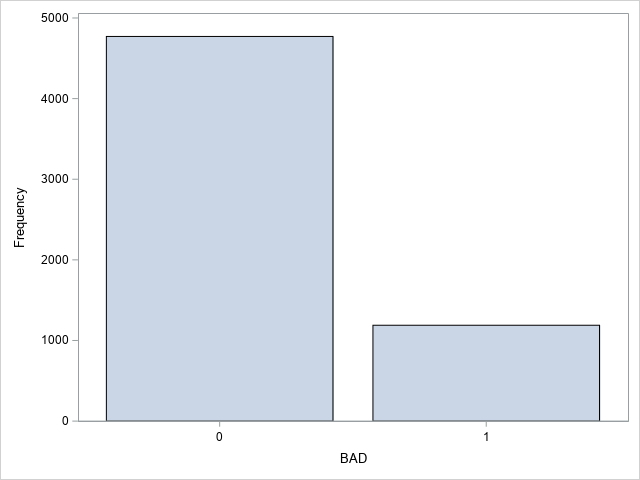

In [11]:
hmeq.bar('bad')

What kinds of jobs do people in this data set have?


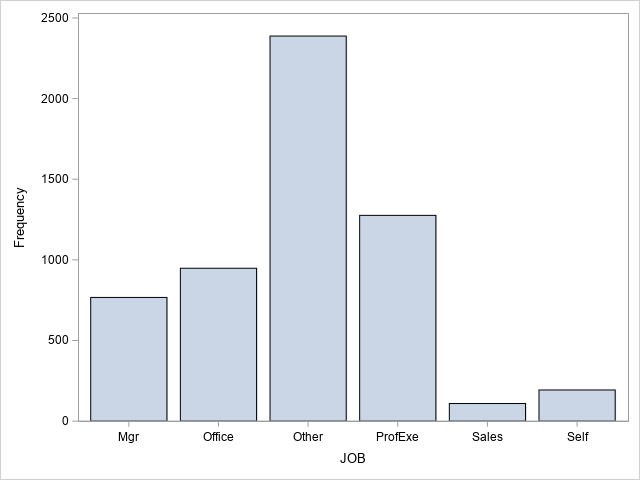

In [12]:
hmeq.bar('job')

Why are people seeking this loan?


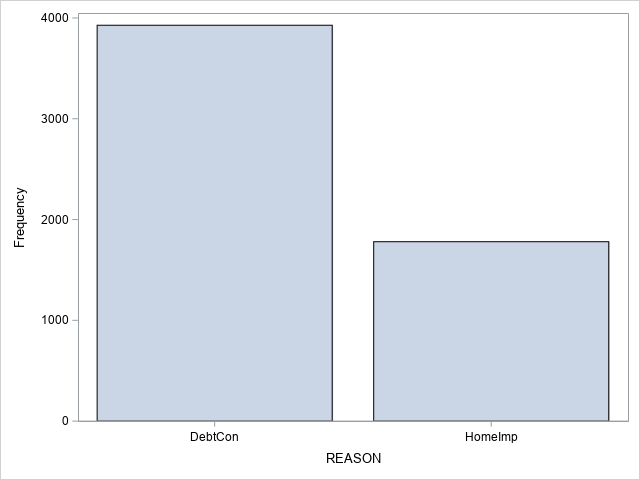

In [13]:
hmeq.bar('reason')

Is there a relationship between Debt-to-Income Ratio and the amount of the requested loan?


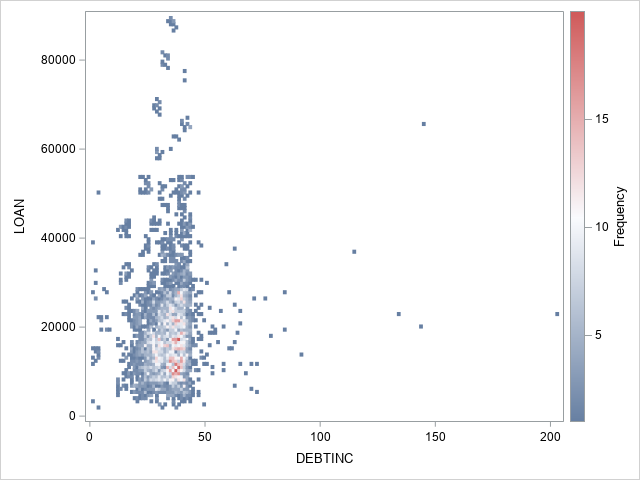

In [14]:
hmeq.heatmap('DEBTINC', 'LOAN')

***
## Running SAS Code
If you are interested in the SAS code behind any of the functions, you can use the teach_me_SAS() function. 

In [15]:
sas.teach_me_SAS(True)
hmeq.heatmap('DEBTINC', 'LOAN')
sas.teach_me_SAS(False)

proc sgplot data=mylib.hmeq ;
	heatmap x='DEBTINC'n y='LOAN'n;;
run;
title;


There are two ways to use SAS code in a Jupyter cell. You can use the SAS cell magic, denoted by *%%SAS session_name* or the submit function.


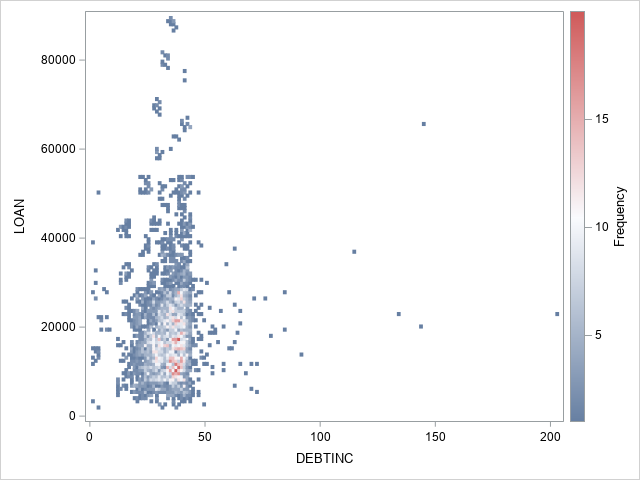

In [16]:
%%SAS sas

proc sgplot data=mylib.hmeq ;
    heatmap x='DEBTINC'n y='LOAN'n;;
run;

title;


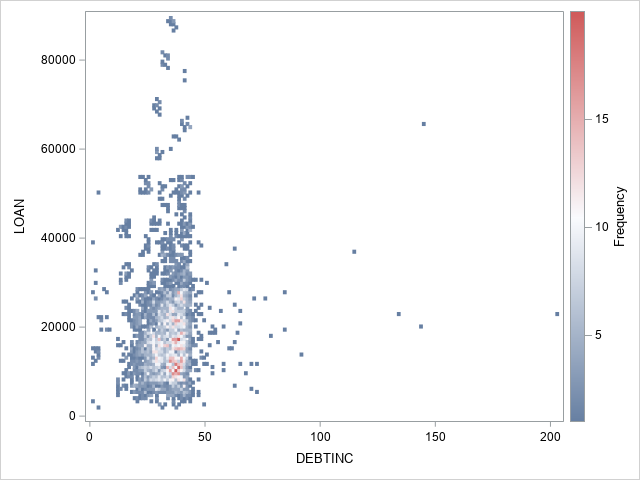

In [17]:
ll = sas.submit('''
proc sgplot data=mylib.hmeq ;
    heatmap x='DEBTINC'n y='LOAN'n;;
run;

title;
''')
sas.HTML(ll['LST'])

Now that we have explored our data, we can begin cleaning. 
***
## Data Cleaning
Earlier, we saw that we had some missing values. Let's impute those missing values. 

In [18]:
hmeq.impute({'MEDIAN':[ 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC','DELINQ']})
hmeq.add_vars({'JOB':'COALESCEC(JOB, "Other")'})
hmeq.add_vars({'REASON': 'COALESCEC(REASON, "DebtCon")'})

data _null_; d = open('mylib.hmeq');
nvars = attrn(d, 'NVARS');
vn='VARNUMS='; vl='VARLIST='; vt='VARTYPE=';
put vn nvars; put vl;
do i = 1 to nvars; var = varname(d, i); put var; end;
put vt;
do i = 1 to nvars; var = vartype(d, i); put var; end;
run;
29                                                         The SAS System                             14:39 Friday, October 18, 2019

323        
324        data mylib.hmeq; set mylib.hmeq;
325        JOB = COALESCEC(JOB, "Other");
326        ; run;

NOTE: There were 5960 observations read from the data set MYLIB.HMEQ.
NOTE: The data set MYLIB.HMEQ has 5960 observations and 13 variables.
NOTE: DATA statement used (Total process time):
      real time           0.00 seconds
      cpu time            0.00 seconds
      

327        
328        
31                                                         The SAS System                             14:39 Friday, October 18, 2019

341        
342        data mylib.hmeq; set mylib.hmeq;
343    

Next we can partition our data into training and testing.

In [19]:
hmeq.partition(fraction=.7)
hmeq.head()

Obs,REASON,JOB,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,_PartInd_
1,DebtCon,Office,0,26800,46236,62711,17,0,0,175.075,1,22,33.0599,1
2,DebtCon,Office,0,26900,74982,126972,0,0,0,315.819,0,23,38.3260,1
3,DebtCon,Other,0,26900,67144,92923,16,0,0,89.112,1,17,32.7915,1
4,DebtCon,Other,0,26900,45763,73797,23,0,0,291.592,1,29,39.3709,1
5,DebtCon,ProfExe,0,27000,144901,178093,7,0,0,331.114,0,34,40.5666,1


Finally, we will create some variable names to represent our various inputs.

In [20]:
# Target
t = 'BAD'
# Class Variables 
var_class = ['REASON','JOB', 'BAD']
# Interval Variables 
var_interval = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
# Input Variables 
var_inputs = ['REASON','JOB', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

Now we are ready for modeling!
***
## Analytical Modeling using SAS Procedures 
### Getting Started Building SAS Models
The HMEQ data is now in shape for modeling. We will first create a logistic regression, a decision tree, and a random forest model in SAS. Before we begin, we need to load our SAS product packages.

In [21]:
stat=sas.sasstat()
ml=sas.sasml()

If you want to know the contents of a product package, you can examine the contents of each package using the dir() function.

In [22]:
dir(stat)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'factor',
 'glm',
 'hplogistic',
 'hpreg',
 'hpsplit',
 'logger',
 'logistic',
 'mixed',
 'phreg',
 'reg',
 'sas',
 'sasproduct',
 'tpspline',
 'ttest']

In addition, you can explore the parameters of a specific function with a ?

In [23]:
?stat.hpsplit

Great, everything is set up so let's start building our models!
### SAS Logistic Regression
We will use [PROC HPLOGISTIC](https://go.documentation.sas.com/?cdcId=pgmsascdc&cdcVersion=9.4_3.4&docsetId=stathpug&docsetTarget=stathpug_hplogistic_toc.htm&locale=en) to create a logistic regression. We can use the dir() function again to examine the results. 

In [24]:
hplogistic_model = stat.hplogistic(data=hmeq, 
                                   cls=var_class, 
                                   model="bad(event='1')= reason job YOJ loan mortdue value debtinc clage",  
                                   out = 'mylib.log_score predicted=Pred',
                                   id = ["_PartInd_", "BAD"], 
                                   partition="rolevar=_partind_(TRAIN='1' VALIDATE='0');")
dir(hplogistic_model)

['CLASSLEVELS',
 'CONVERGENCESTATUS',
 'DATAACCESSINFO',
 'DIMENSIONS',
 'FITSTATISTICS',
 'GLOBALTESTS',
 'ITERHISTORY',
 'LOG',
 'MODELINFO',
 'NOBS',
 'PARAMETERESTIMATES',
 'PARTFITSTATS',
 'PERFORMANCEINFO',
 'RESPONSEPROFILE']

### SAS Decision Tree 
We will use [PROC HPSPLIT](https://go.documentation.sas.com/?cdcId=pgmsascdc&cdcVersion=9.4_3.4&docsetId=statug&docsetTarget=statug_hpsplit_syntax.htm&locale=en) to create a decision tree.

In [25]:
hpsplit_model = stat.hpsplit(data=hmeq, 
                             cls=var_class, 
                             model="bad(event='1')= reason job YOJ loan mortdue value debtinc clage", 
                             code='trescore.sas', 
                             procopts='assignmissing=similar', 
                             out = 'mylib.dt_score',
                             id = "_PartInd_",
                             partition="rolevar=_partind_(TRAIN='1' VALIDATE='0');")
dir(hpsplit_model)

['CONFUSIONMATRIX',
 'DATAACCESSINFO',
 'LOG',
 'MODELINFO',
 'NOBS',
 'PERFORMANCEINFO',
 'PRUNINGPLOT',
 'ROCPLOT',
 'TREEPERFORMANCE',
 'VARIMPORTANCE',
 'WHOLETREEPLOT',
 'ZOOMEDTREEPLOT']


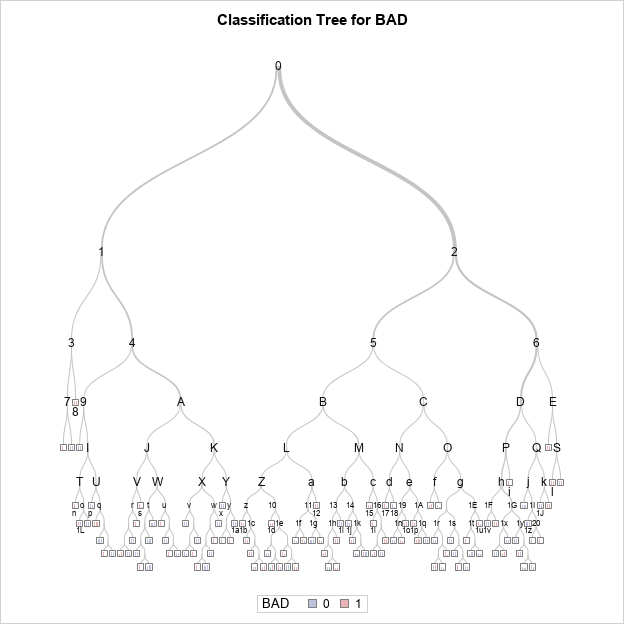

In [26]:
hpsplit_model.WHOLETREEPLOT

### SAS Random Forest Model 
We will use [PROC HPFOREST](https://go.documentation.sas.com/?cdcId=pgmsascdc&cdcVersion=9.4_3.4&docsetId=emhpprcref&docsetTarget=emhpprcref_hpforest_toc.htm&locale=en) to create a random forest model. In the previous examples, we used the SAS/STAT product, but for the next model, we will be using the Machine Learning (ML) product. 

In [27]:
hpforest_model = ml.hpforest(data=hmeq, 
                             input=var_inputs, 
                             target="BAD /level = binary",
                             score = "out = mylib.forest_score",
                             id = "_PartInd_",
                             partition="rolevar=_partind_(TRAIN='1' VALIDATE='0');")
dir(hpforest_model)

['BASELINE',
 'DATAACCESSINFO',
 'FITSTATISTICS',
 'LOG',
 'MODELINFO',
 'NTRAINVALID',
 'PERFORMANCEINFO',
 'VARIABLEIMPORTANCE']

We have created three SAS models and using the *out* and *score* parameters, we have also created scored data sets. We will use this scored data for model assessment and comparison later in the notebook. 
## Analytical Modeling using Python Functions
### Getting Started Building Python Models
Before we can begin using Python Functions on our HMEQ data, we must convert our SAS data set into a Pandas Data Frame. 


In [28]:
df = hmeq.to_df()
df.head()

,REASON,JOB,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,_PartInd_
0,DebtCon,Office,0,26800,46236.0,62711.0,17.0,0,0,175.075058,1,22,33.059934,1
1,DebtCon,Office,0,26900,74982.0,126972.0,0.0,0,0,315.818911,0,23,38.325990,1
2,DebtCon,Other,0,26900,67144.0,92923.0,16.0,0,0,89.112173,1,17,32.791478,1
3,DebtCon,Other,0,26900,45763.0,73797.0,23.0,0,0,291.591682,1,29,39.370858,1
4,DebtCon,ProfExe,0,27000,144901.0,178093.0,7.0,0,0,331.113972,0,34,40.566552,1


In SAS, we could get by with letting the function know which variables are class variables, but in Python we are going to need to create dummy variables for our class variables.   

In [29]:
# Create dummy vars for reason 
r_dummies = pd.get_dummies(df['REASON'])
r_dummies = r_dummies.fillna(0)
# Create dummy vars for job 
j_dummies = pd.get_dummies(df['JOB'])
j_dummies = j_dummies.fillna(0)
# Put our dummy vars in our dataframe
df = pd.concat([df, r_dummies, j_dummies], axis=1)
# Drop the original class columns and one dummy var to prevent multicollinearity
df = df.drop(['REASON', 'JOB', 'HomeImp',  'Self'], axis=1)
# Fill missing values with the mean 
df.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,_PartInd_,DebtCon,Mgr,Office,Other,ProfExe,Sales
0,0,26800,46236.0,62711.0,17.0,0,0,175.075058,1,22,33.059934,1,1,0,1,0,0,0
1,0,26900,74982.0,126972.0,0.0,0,0,315.818911,0,23,38.325990,1,1,0,1,0,0,0
2,0,26900,67144.0,92923.0,16.0,0,0,89.112173,1,17,32.791478,1,1,0,0,1,0,0
3,0,26900,45763.0,73797.0,23.0,0,0,291.591682,1,29,39.370858,1,1,0,0,1,0,0
4,0,27000,144901.0,178093.0,7.0,0,0,331.113972,0,34,40.566552,1,1,0,0,0,1,0


Now let us create our training and testing data. 

In [30]:
features = ['LOAN', 'MORTDUE', 'VALUE', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 
            'DEBTINC', 'DebtCon', 'Mgr', 'Office', 'Other', 'ProfExe', 'Sales']
train = df[df['_PartInd_']==1]
test = df[df['_PartInd_']==0]
X_train = train[features]
X_train = X_train.fillna(X_train.mean())
X_test = test[features]
X_test = X_test.fillna(X_train.mean())
y_train = train.BAD
y_test = test.BAD

Now we are ready to begin modeling in Python. 
### Python Logistic Regression 
First we will create a logistic regression using the [LogisticRegression() function from sklearn]( https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).


In [31]:
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

### Python Decision Tree
Next, we will create a decision tree using the [DecisionTreeClassifier() function from sklearn]( https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).


In [32]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)

### Python Random Forest
And now we will create a random forest using the [RandomForestClassifer() function from sklearn]( https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).


In [33]:
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

Now we have three SAS models and three Python models. We will complete this exercise by comparing model performance.
## Model Comparison 
There are various metrics by which we can compare our models, but here will we use a confusion matrix and a ROC Curve. 
### Confusion Matrix
First, I am going to bring all of the SAS results into a Pandas data frame to make the comparison easier.

In [34]:
# SAS Logistic Regression
log_score = sas.sasdata('log_score','mylib')
df_log = log_score.to_df()
# SAS Decision Tree
dt_score = sas.sasdata('dt_score','mylib')
df_dt = dt_score.to_df()
# SAS Random Forest
forest_score = sas.sasdata('forest_score','mylib')
df_rf = forest_score.to_df()

Now, I am going to use the [confustion_matrix() function from sklearn]( https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and add all of the results into one data frame. 

In [35]:
# Results Data Frame
cols = ['Model', 'TruePositve', 'FalsePositive', 'FalseNegative', 'TrueNegative']
cm = pd.DataFrame(columns=cols)

# SAS Logistic Regression 
df_log['PredProb'] = [1 if x >= .5 else 0 for x in df_log['Pred']]
df_log = df_log[df_log._PartInd_ == 0]
log_cm = confusion_matrix(df_log['BAD'], df_log['PredProb'])
log_cm_d=pd.DataFrame([['SAS Logistic Regression', log_cm[0,0], log_cm[0,1], log_cm[1,0], log_cm[1,1]]], columns=cols)
cm = cm.append(log_cm_d)

# SAS Decision Tree
df_dt['Pred'] = [1 if x >= .5 else 0 for x in df_dt['P_BAD1']]
df_dt = df_dt[df_dt._PartInd_ == 0]
dt_cm = confusion_matrix(df_dt['BAD'], df_dt['Pred'])
dt_cm_d=pd.DataFrame([['SAS Decision Tree', dt_cm[0,0], dt_cm[0,1], dt_cm[1,0], dt_cm[1,1]]], columns=cols)
cm = cm.append(dt_cm_d)

# SAS Random Forest
df_rf['Pred'] = [1 if x >= .5 else 0 for x in df_rf['P_BAD1']]
df_rf = df_rf[df_rf._PartInd_ == 0]
rf_cm = confusion_matrix(df_rf['BAD'], df_rf['Pred'])
rf_cm_d=pd.DataFrame([['SAS Random Forest', rf_cm[0,0], rf_cm[0,1], rf_cm[1,0], rf_cm[1,1]]], columns=cols)
cm = cm.append(rf_cm_d)

# Python Logistic Regression
py_log_cm = confusion_matrix(y_test, lr_y_pred)
py_log_cm_d=pd.DataFrame([['Python Logistic Regression', 
                           py_log_cm[0,0], py_log_cm[0,1], py_log_cm[1,0], py_log_cm[1,1]]], columns=cols)
cm = cm.append(py_log_cm_d)

# Python Decision Tree
py_dt_cm = confusion_matrix(y_test, dt_y_pred)
py_dt_cm_d=pd.DataFrame([['Python Decision Tree', 
                           py_dt_cm[0,0], py_dt_cm[0,1], py_dt_cm[1,0], py_dt_cm[1,1]]], columns=cols)
cm = cm.append(py_dt_cm_d)

# Python Random Forest
py_rf_cm = confusion_matrix(y_test, rf_y_pred)
py_rf_cm_d=pd.DataFrame([['Python Random Forest', 
                           py_rf_cm[0,0], py_rf_cm[0,1], py_rf_cm[1,0], py_rf_cm[1,1]]], columns=cols)
cm = cm.append(py_rf_cm_d)

Finally, we can view the results of our labors. 

In [36]:
cm

,Model,TruePositve,FalsePositive,FalseNegative,TrueNegative
0,SAS Logistic Regression,1445,7,321,15
0,SAS Decision Tree,1375,77,173,163
0,SAS Random Forest,1406,46,106,230
0,Python Logistic Regression,1449,3,329,7
0,Python Decision Tree,1348,104,111,225
0,Python Random Forest,1407,45,122,214


### ROC Curve
For our more visual users, let's plot a ROC Curve and find the area under the curve for each of our models.

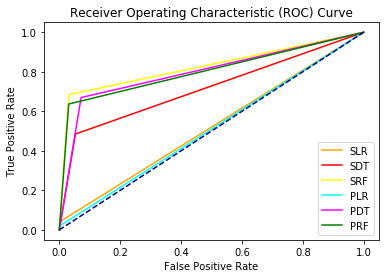

In [37]:
# SAS Logistic Regression
slr_fpr, slr_tpr, slr_thresholds = roc_curve(df_log['BAD'], df_log['PredProb'])
plt.plot(slr_fpr, slr_tpr, color='orange', label='SLR')

# SAS Decistion Tree
sdt_fpr, sdt_tpr, sdt_thresholds = roc_curve(df_dt['BAD'], df_dt['Pred'])
plt.plot(sdt_fpr, sdt_tpr, color='red', label='SDT')

# SAS Random Forest
srf_fpr, srf_tpr, srf_thresholds = roc_curve(df_rf['BAD'], df_rf['Pred'])
plt.plot(srf_fpr, srf_tpr, color='yellow', label='SRF')

# Python Logistic Regression
plr_fpr, plr_tpr, plr_thresholds = roc_curve(y_test, lr_y_pred)
plt.plot(plr_fpr, plr_tpr, color='cyan', label='PLR')

# Python Decition Tree
pdt_fpr, pdt_tpr, pdt_thresholds = roc_curve(y_test, dt_y_pred)
plt.plot(pdt_fpr, pdt_tpr, color='magenta', label='PDT')

# Python Random Forest
prf_fpr, prf_tpr, prf_thresholds = roc_curve(y_test, rf_y_pred)
plt.plot(prf_fpr, prf_tpr, color='green', label='PRF')

# Finising Plot
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [38]:
# SAS Logistic Regression
slr_auc = roc_auc_score(df_log['BAD'], df_log['PredProb'])
print('SAS Logistic Regression AUC: %.2f' % slr_auc)
# SAS Decision Tree
sdt_auc = roc_auc_score(df_dt['BAD'], df_dt['Pred'])
print('SAS Decision Tree: %.2f' % sdt_auc)
# SAS Random Forest
srf_auc = roc_auc_score(df_rf['BAD'], df_rf['Pred'])
print('SAS Random Forest: %.2f' % srf_auc)
# Python Logistic Regression 
plr_auc = roc_auc_score(y_test, lr_y_pred)
print('Python Logistic Regression: %.2f' % plr_auc)
# Python Decision Tree
pdt_auc = roc_auc_score(y_test, dt_y_pred)
print('Python Decision Tree: %.2f' % pdt_auc)
# Python Random Forest
prf_auc = roc_auc_score(y_test, rf_y_pred)
print('Python Random Forest: %.2f' % prf_auc)

SAS Logistic Regression AUC: 0.52
SAS Decision Tree: 0.72
SAS Random Forest: 0.83
Python Logistic Regression: 0.51
Python Decision Tree: 0.80
Python Random Forest: 0.80


*** 
## Conclusion
Today there are many different programming languages available to analysts and  it would be a shame to limit access.  Everyone has different skills and preferences.  Different programming languages provide different capabilities.  Whether it is R, Python, Lua, SAS or other languages, analysts should be free to choose what works best for them. That perfect balance of choice and control is what gives organizations the ability to accelerate the analytics life cycle. They need a platform that fully supports all phases of Data Discovery and Deployment regardless of what data is being used, the analytics being leveraged or how the models are being deployed.  This is what the SAS Platform does.   We can help ask the right questions, find the right answers and get tangible results from analytics. In this notebook we harnessed the power of SASPy to use SAS procedures from a Python syntax, reducing the silos built between Python programmers and SAS programmers while giving analysts a choice in programming languages. 
For more information on SASPy, please see the [SASPy documentation](https://sassoftware.github.io/saspy/), the [SASPy GitHub page](https://github.com/sassoftware/saspy), and the [SASPy example notebooks](https://github.com/sassoftware/saspy-examples/).
***